# Statistical Thinking in Python 1

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# Set default Seaborn style
sb.set()

# setting plot defatult size
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 5)

Populating the interactive namespace from numpy and matplotlib


## 1. Graphical exploratory data analysis

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
virginica_petal_length = iris.data[100:150,2]
virginica_petal_length

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

### Histogram

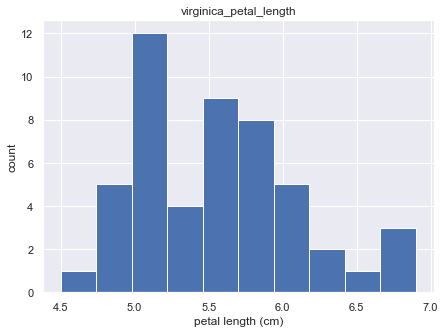

In [56]:
plt.hist(virginica_petal_length)
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.title('virginica_petal_length')
plt.show()

In [57]:
# Adjusting the number of bins

In [58]:
n_data = len(virginica_petal_length)
n_bins = int(np.sqrt(n_data))
n_bins

7

Text(0.5, 1.0, 'virginica_petal_length')

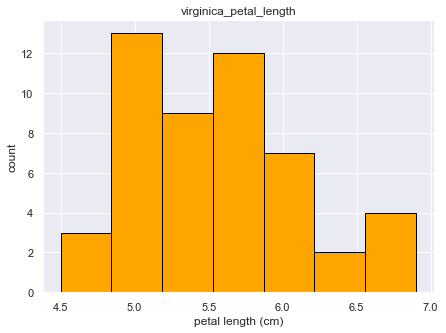

In [59]:
plt.hist(virginica_petal_length, bins=n_bins, edgecolor='black', facecolor='orange')
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.title('virginica_petal_length')

### Transform iris dataset to pandas DataFrame

In [12]:
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
# 0:setosa, 1:versicolor, 2:virginica
df_iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
df_iris['target'] = df_iris['target'].astype('int')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
def make_species(x):
    l_species = []
    for i in x:
        if (i == 0):
            l_species.append('setosa')
        elif (i == 1):
            l_species.append('versicolor')
        else:
            l_species.append('virginica')
            
    return l_species

In [15]:
df_iris['species'] = make_species(np.array(df_iris['target']))
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Bee swarm plots

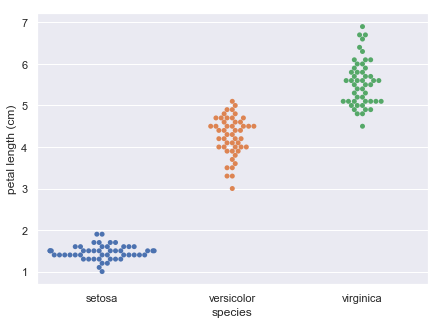

In [60]:
_ = sb.swarmplot(x='species', y='petal_length', data=df_iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

In [17]:
# 2012년 미국 대선 데이터

In [18]:
df = pd.read_csv('data/election2012.csv')
states = (df['state'] == 'CA') | (df['state'] == 'NY') | (df['state'] == 'OH') | (df['state'] == 'TX')
df2012 = df.loc[states]
df2012.head()

,state,county,Obama,Romney,winner,total,margin,turnout
157,CA,Alameda,78.5,18.7,Obama,542421,59.8,2.8
158,CA,Alpine,60.1,36.5,Obama,625,23.6,3.4
159,CA,Amador,39.2,58.2,Romney,14904,19.0,2.6
160,CA,Butte,46.4,50.3,Romney,67879,3.9,3.3
161,CA,Calaveras,40.1,57.1,Romney,17941,17.0,2.8


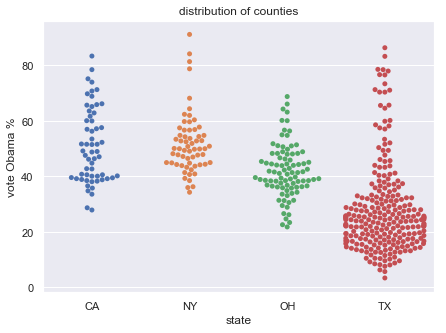

In [61]:
_ = sb.swarmplot(x='state', y='Obama', data=df2012)
_ = plt.xlabel('state')
_ = plt.ylabel('vote Obama %')
_ = plt.title('distribution of counties')
plt.show()

## Empirical cumulative distribution function (ECDF)

* 경험적 누적분포함수는 데이터 분포의 적합(fit)을 평가하거나 서로 다른 여러 표본 분포를 비교할 때 사용한다. 그리고 표본으로부터 모집단 백분위수를 추정할 수 있다.

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)      # Number of data points
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

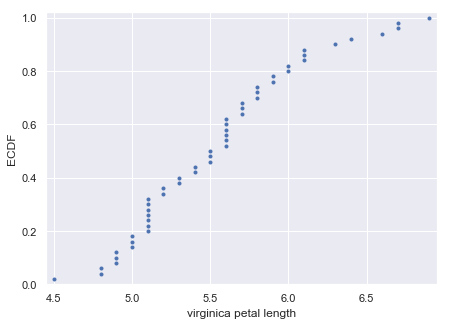

In [63]:
# Compute ECDF for versicolor data
x_value, y_value = ecdf(virginica_petal_length)

# Generate plot
_ = plt.plot(x_value, y_value, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.ylabel('ECDF')
_ = plt.xlabel('virginica petal length')
plt.show()

# analysis
# 4.5 ~ 5.5cm : 전체의 50%
# 6.0cm 이상 : 전체의 20%

In [22]:
# Comparison of ECDFs

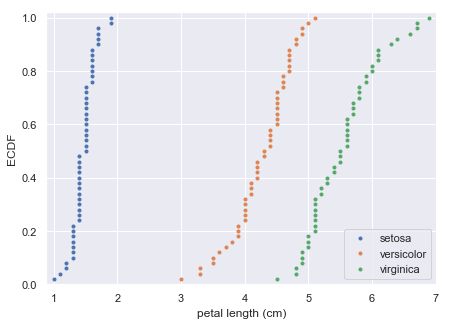

In [64]:
setosa_petal_length = iris.data[0:50,2]
versicolor_petal_length = iris.data[50:100,2]
virginica_petal_length = iris.data[100:150,2]

x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

In [25]:
# 2012 미국 대선

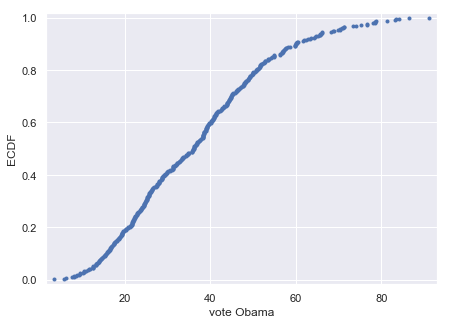

In [68]:
# county별 오바마의 득표율

vote_ob = df2012['Obama']
x_set, y_set = ecdf(vote_ob)
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('vote Obama')
_ = plt.ylabel('ECDF')

# 전체 county의 80 %가 지지율 50 % 이하이다.
# 20 % 이하의 지지율을 보인 county는 전체의 20 %이다.

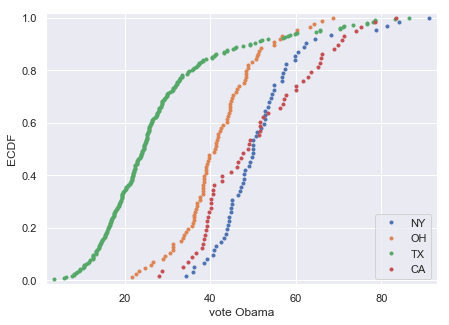

In [73]:
# 4개 주 비교

vote_ca = df2012[df2012['state'] == 'CA']['Obama']
vote_ny = df2012[df2012['state'] == 'NY']['Obama']
vote_oh = df2012[df2012['state'] == 'OH']['Obama']
vote_tx = df2012[df2012['state'] == 'TX']['Obama']

x_1, y_1 = ecdf(vote_ny)
x_2, y_2 = ecdf(vote_oh)
x_3, y_3 = ecdf(vote_tx)
x_4, y_4 = ecdf(vote_ca)

_ = plt.plot(x_1, y_1, marker='.', linestyle='none')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none')
_ = plt.plot(x_3, y_3, marker='.', linestyle='none')
_ = plt.plot(x_4, y_4, marker='.', linestyle='none')

plt.margins(0.02)
_ = plt.legend(('NY', 'OH', 'TX', 'CA'), loc='lower right')
_ = plt.xlabel('vote Obama')
_ = plt.ylabel('ECDF')

## 2. Quantitative exploratory data analysis

### Box plot

In [74]:
print('CA : mean {:.2f} : median {:.2f}'.format(np.mean(vote_ca), np.median(vote_ca)))
print('NY : mean {:.2f} : median {:.2f}'.format(np.mean(vote_ny), np.median(vote_ny)))
print('OH : mean {:.2f} : median {:.2f}'.format(np.mean(vote_oh), np.median(vote_oh)))
print('TX : mean {:.2f} : median {:.2f}'.format(np.mean(vote_tx), np.median(vote_tx)))

CA : mean 51.00 : median 48.90
NY : mean 51.97 : median 50.00
OH : mean 42.00 : median 41.25
TX : mean 27.93 : median 24.40


In [77]:
# percentile
percentiles = np.array([2.5, 25, 50, 75, 97.5])

pt_ca = np.percentile(vote_ca, percentiles)
pt_tx = np.percentile(vote_tx, percentiles)

print(pt_ca)
print(pt_tx)

[30.7825 39.725  48.9    61.3    77.0975]
[ 8.5975 17.6    24.4    32.3    75.56  ]


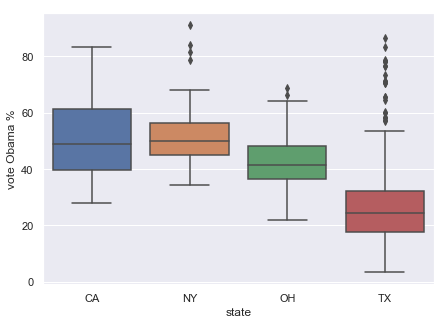

In [75]:
sb.boxplot(x='state', y='Obama', data=df2012)
_ = plt.xlabel('state')
_ = plt.ylabel('vote Obama %')
plt.show()

[ 2.5 25.  50.  75.  97.5]
[30.7825 39.725  48.9    61.3    77.0975]


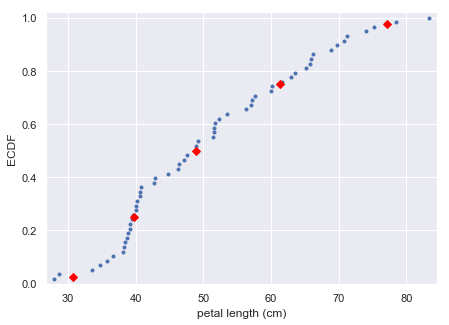

In [79]:
# percentiles with ECDF

x_set, y_set = ecdf(vote_ca)

_ = plt.plot(x_set, y_set, '.')
_ = plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(pt_ca, percentiles/100, marker='D', color='red', linestyle='none')

print(percentiles)
print(pt_ca)

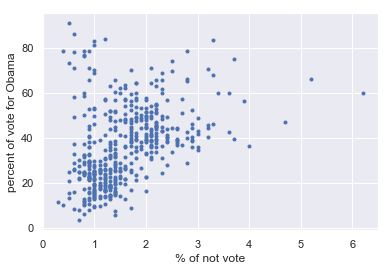

In [32]:
# 미투표자 비율 대비 오바마 지지율
_ = plt.plot(df2012.turnout, df2012.Obama, marker='.', linestyle='none')
_ = plt.xlabel('% of not vote')
_ = plt.ylabel('percent of vote for Obama')

In [33]:
# 공분산
np.cov(df2012.turnout, df2012.Obama)

array([[  0.56269093,   4.97298927],
       [  4.97298927, 299.29556718]])

In [80]:
# Pearson correlation coefficent
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

pearson_r(df2012.turnout, df2012.Obama)

0.3832061069070488

## 3. Probability - Discrete variables

### Bernoulli trials - 1 or 0 (성공 / 실패)

In [81]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    
    n_success = 0

    for i in range(n):
        # Choose random number between 0 and 1
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

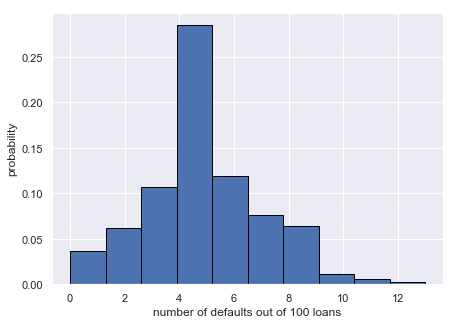

In [88]:
# 100 명의 대출자. 파산 확률 0.05. 1000 번 시뮬레이션.

n_defaults = np.empty(1000)  # 시뮬레이션 결과 저장.

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, density=True, edgecolor='black')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

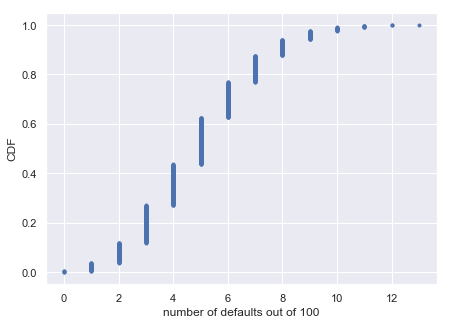

Probability of losing money = 0.024


In [86]:
# 위 상황에 대한 ECDF
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')
plt.show()

# 파산자가 10명 이상이 될 경우의 수 합계
n_lose_money = np.sum(n_defaults >= 10)
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Binomial distribution (이항 분포)

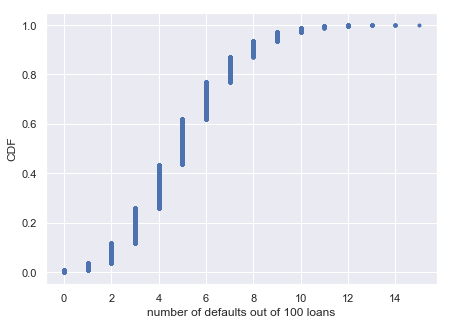

In [89]:
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# CDF
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')
plt.show()

### Probability mass function (PMF) - The set of probabilities of discrete outcomes

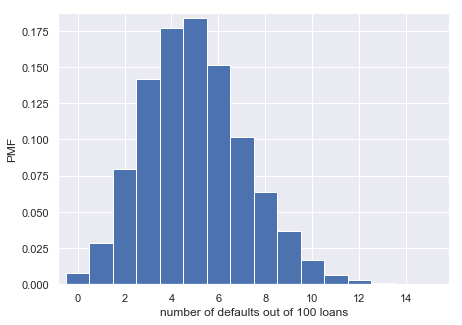

In [90]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, density=True, bins=bins, edgecolor='white')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')
plt.margins(0.02)
plt.show()

### Relationship between Binomial and Poisson distributions

* Poisson distribution is a limit of the Binomial distribution for rare events. 

가정 : a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story.

We get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). 

Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [96]:
# Draw 10,000 samples out of Poisson distribution
samples_poisson = np.random.poisson(10, size=10000)

print('Poisson : ', np.mean(samples_poisson), np.std(samples_poisson))

# Specify values of n and p to consider for Binomial
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    print('n =', n[i], 'Binom :', np.mean(samples_binomial), np.std(samples_binomial))

Poisson :  9.9155 3.1595189111635333
n = 20 Binom : 9.9694 2.22428946857193
n = 100 Binom : 9.9814 2.9982751774978897
n = 1000 Binom : 10.0258 3.1774414801849615


* How many no-hitters game in a season?
* 투수가 상대팀에게 hit을 전혀 주지 않은 게임
* 이는 드문 일이며 1901 년부터 2015 년까지 20 만 개 이상의 게임에서 251 개만 발생.

In [101]:
# Draw 10,000 samples out of Poisson distribution
# 251/115 : 115년 동안 251건 발생

n_nohitters = np.random.poisson(251/115, size=10000)

# 한 시즌에 n_nohitters가 7 게임이상일 확률
n_large = np.sum(n_nohitters >= 7)
p_large = n_large / 10000

print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0077


## 4. Probability - Continuous variables

In [41]:
# 1926년부터 경마 최고 기록
horse_race = np.array([ 148.51, 146.65, 148.52, 150.7, 150.42, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1, 147.2, 146., 149.8, 147., 147.2, 147.8, 148.2, 149., 149.8, 148.6, 146.8, 149.6, 149., 148.2, 149.2, 148., 150.4, 148.8, 147.2, 148.8, 149.6, 148.4, 148.4, 150.2, 148.8, 149.2, 149.2, 148.4, 150.2, 146.6, 149.8, 149., 150.8, 148.6, 150.2, 149., 148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2, 149.2, 151., 149.6, 149.6, 149.4, 148.6, 150., 150.6, 149.2, 152.6, 152.8, 149.6, 151.6, 152.8, 153.2, 152.4, 152.2 ])

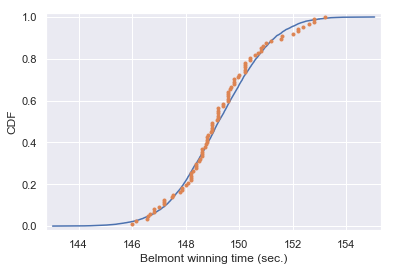

In [42]:
# 평균과 표준편차
mu = np.mean(horse_race)
sigma = np.std(horse_race)
horse_race
# 샘플링
samples = np.random.normal(mu, sigma, size=10000)

# 샘플링 데이터와 실제 데이터의 CDF
x_theor, y_theor = ecdf(samples)
x, y = ecdf(horse_race)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.margins(0.02) 
plt.show()

In [43]:
np.min(horse_race)

146.0

In [44]:
# 위 기록을 깰 확률을 시뮬레이션

In [45]:
samples = np.random.normal(mu, sigma, size=100000)
prob = np.sum(samples <= 146) / len(samples)

print('위 기록을 깰 확률:', prob)

위 기록을 깰 확률: 0.02086


### Exponential distribution

In [46]:
# 미국 메이저리그 야구
# no-hitter : 투수가 한 경기에서 한번도 안타를 내주지 않음. 평균 764 경기 당 1회 발생.
# cycling hit : 타자가 한 경기에서 1루타, 2루타, 3루타, 홈런을 모두 기록. 평균 715 경기 당 1회 발생.

In [47]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

In [48]:
# no-hitter와 cycling hit가 같이 나타나기 까지의 waiting game 수 시뮬레이션
waiting_times = successive_poisson(764, 715, size=100000)
waiting_times

array([ 309.75746956, 1583.61308885, 2332.0540037 , ...,  959.72649845,
        416.45805369,  490.65928507])

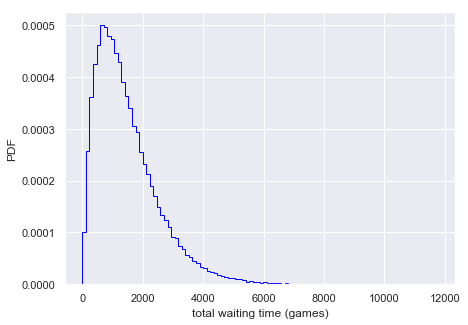

In [91]:
_ = plt.hist(waiting_times, bins=100, histtype='step', density=True, edgecolor='blue')
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')
plt.show()